In [3]:
from elasticsearch import Elasticsearch
import matplotlib.pyplot as plt

In [5]:
client = Elasticsearch(
            'https://localhost:9200',
            ca_certs='/home/reto08/elasticsearch-8.7.0/config/certs/http_ca.crt',
            basic_auth=('elastic', "Nik=EKM=oTj45I-G3pgP"))
client.info()

ObjectApiResponse({'name': 'reto08-VirtualBox', 'cluster_name': 'elasticsearch', 'cluster_uuid': 'MUJlYirJTmuSksVWKFD0uw', 'version': {'number': '8.7.0', 'build_flavor': 'default', 'build_type': 'tar', 'build_hash': '09520b59b6bc1057340b55750186466ea715e30e', 'build_date': '2023-03-27T16:31:09.816451435Z', 'build_snapshot': False, 'lucene_version': '9.5.0', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'})

In [6]:
from elasticsearch.helpers import scan

index = 'amarillo_firewall'
query = {'query': {'match_all': {}}}

resp_ac = scan(client, query=query, index=index, size=10000)

result=[]
# Iterar sobre los resultados
for hit in resp_ac:
    # Hacer lo que necesites con cada registro
    result.append(hit['_source'])

In [22]:
import pandas as pd
df = pd.DataFrame(result)


In [6]:
df.shape

(65532, 22)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que el DataFrame se llama 'df' y contiene los datos

# Gráfico 1: Histograma de los Bytes
plt.figure(figsize=(8, 6))
plt.hist(df['Bytes'], bins=10)
plt.xlabel('Bytes')
plt.ylabel('Frecuencia')
plt.title('Histograma de Bytes')

# Gráfico 2: Gráfico de barras de los paquetes enviados
plt.figure(figsize=(8, 6))
plt.bar(df.index, df['pkts_sent'])
plt.xlabel('Índice')
plt.ylabel('Paquetes enviados')
plt.title('Paquetes enviados por índice')

# Gráfico 3: Gráfico de dispersión de Bytes y paquetes enviados
plt.figure(figsize=(8, 6))
plt.scatter(df['Bytes'], df['pkts_sent'])
plt.xlabel('Bytes')
plt.ylabel('Paquetes enviados')
plt.title('Gráfico de dispersión de Bytes y paquetes enviados')

# Continúa generando los gráficos restantes...

# Mostrar los gráficos
plt.show()

In [7]:
# Gráfico 2: Gráfico de barras de los paquetes enviados
plt.figure(figsize=(8, 6))
plt.bar(df.index, df['pkts_sent'])
plt.xlabel('Índice')
plt.ylabel('Paquetes enviados')
plt.title('Paquetes enviados por índice')
plt.show()

KeyboardInterrupt: 

In [1]:
plt.clf()

NameError: name 'plt' is not defined

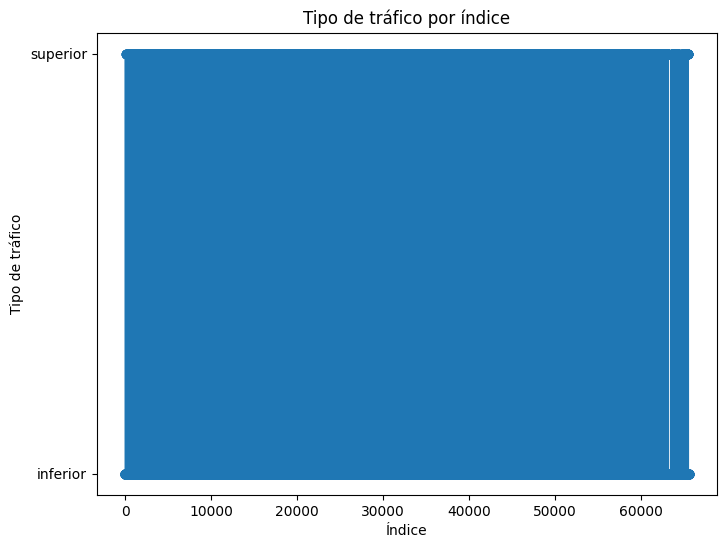

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(df.index, df['trafico'], marker='o')
plt.xlabel('Índice')
plt.ylabel('Tipo de tráfico')
plt.title('Tipo de tráfico por índice')
plt.show()
plt.clf()

<Figure size 1200x600 with 0 Axes>

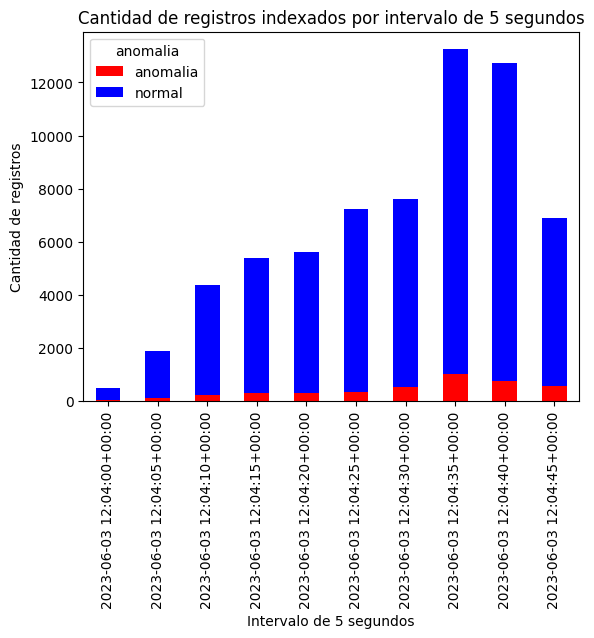

<Figure size 640x480 with 0 Axes>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que el DataFrame se llama 'df' y contiene los datos

# Convertir la columna '@timestamp' a tipo de dato datetime
df['@timestamp'] = pd.to_datetime(df['@timestamp'])

# Definir el intervalo de tiempo de 5 segundos
interval = '5S'

# Agrupar por el intervalo de tiempo y contar la cantidad de registros por cada categoría de anomalía
counts_per_interval = df.groupby([pd.Grouper(key='@timestamp', freq=interval), 'anomalia']).size().unstack()

# Crear el gráfico de barras con dos colores
plt.figure(figsize=(12, 6))
counts_per_interval.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.xlabel('Intervalo de 5 segundos')
plt.ylabel('Cantidad de registros')
plt.title('Cantidad de registros indexados por intervalo de 5 segundos')

# Mostrar el gráfico
plt.show()
plt.clf()

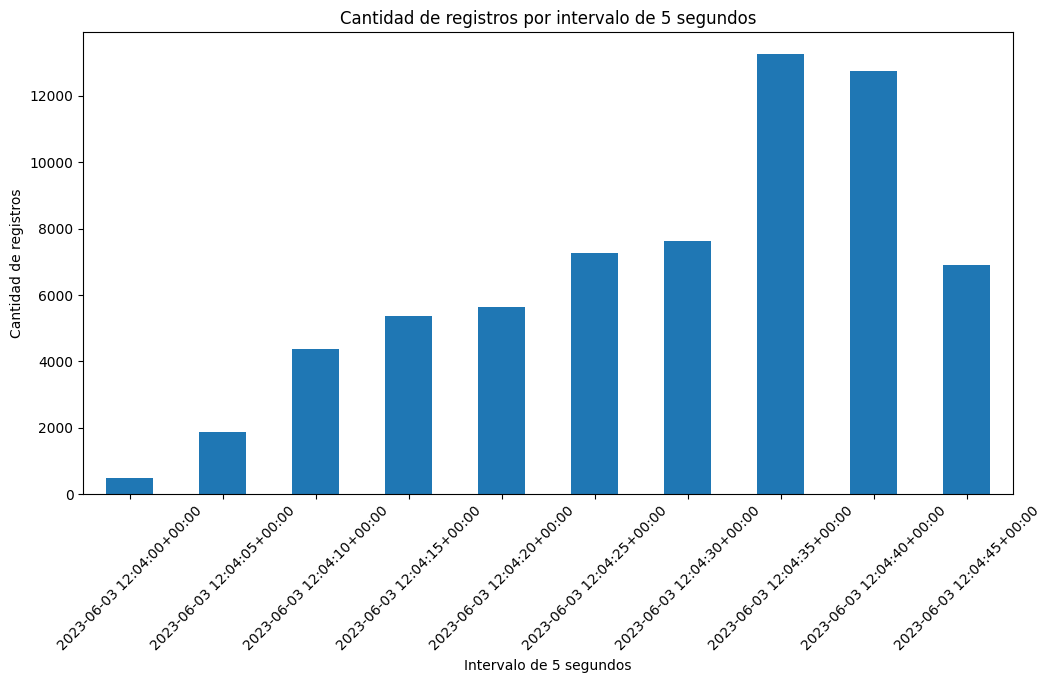

<Figure size 640x480 with 0 Axes>

In [14]:
df['@timestamp'] = pd.to_datetime(df['@timestamp'])

## Definir el intervalo de tiempo de 5 segundos
interval = '5S'

# Agrupar por el intervalo de tiempo y contar la cantidad de registros
counts_per_interval = df.groupby(pd.Grouper(key='@timestamp', freq=interval)).size()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
counts_per_interval.plot(kind='bar')
plt.xlabel('Intervalo de 5 segundos')
plt.ylabel('Cantidad de registros')
plt.title('Cantidad de registros por intervalo de 5 segundos')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()
plt.clf()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Destination Port      65532 non-null  object             
 1   host                  65532 non-null  object             
 2   NAT Destination Port  65532 non-null  object             
 3   pkts_received         65532 non-null  int64              
 4   NAT Source Port       65532 non-null  object             
 5   pkts_sent             65532 non-null  int64              
 6   log                   65532 non-null  object             
 7   trafico               65532 non-null  object             
 8   diferencia_trafico    65532 non-null  int64              
 9   @timestamp            65532 non-null  datetime64[ns, UTC]
 10  Bytes                 65532 non-null  int64              
 11  anomalia              65532 non-null  object             
 12  Elap

In [28]:
columnas_numericas = df.select_dtypes(include=['number'])

# Realizar la agrupación y cálculo de la media
df_filt = df.groupby("anomalia")[columnas_numericas.columns].mean()

In [30]:
df_filt.reset_index()

,anomalia,pkts_received,pkts_sent,diferencia_trafico,Bytes,Elapsed Time (sec),Bytes Sent,Bytes Received,Packets
0,anomalia,903.611422,586.105128,317.506294,1.461203e+06,322.274825,334786.065734,1.126417e+06,1489.716550
1,normal,2.474282,3.242922,-0.768639,1.570276e+03,47.869877,502.168789,1.068107e+03,5.717204
